### 摘要

* 数据可视化
  1. 基本绘图样式
  2. 其他绘图样式
    * 柱状图
    * 直方图
    * 面积图
    * 散点图
    * 六角图(hexbin)
    * 饼状图

  3. 绘图设计样式


In [9]:
# 首先当然是导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

#pd.set_option("display.notebook_repr_html",False)
#pd.set_option("display.max_columns",6)
#pd.set_option("display.max_rows",15)
#pd.set_option("display.width",78)
#pd.set_option("precision",4)

### 基本绘图：plot

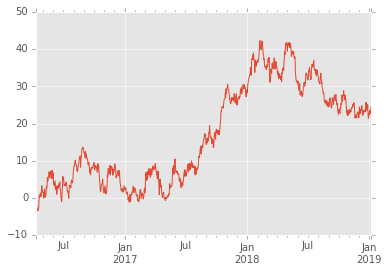

In [3]:
#基于Series，DataFrame的plot方法其实只是一个plt.plot的简单封装
ts = pd.Series(np.random.randn(1000),index=pd.date_range("20160412",periods=1000))
ts = ts.cumsum()

ts.plot()

#如果索引包含日期，
#plot就会调用gcf().autofmt_xdate试图将x轴格式化成更友好的方式，如下

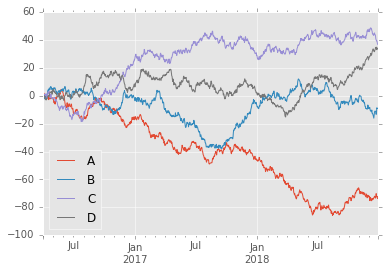

In [8]:
df = pd.DataFrame(np.random.randn(1000,4),index=pd.date_range("20160401",periods=1000),
                  columns=list("ABCD"))
df = df.cumsum()

plt.figure();df.plot()

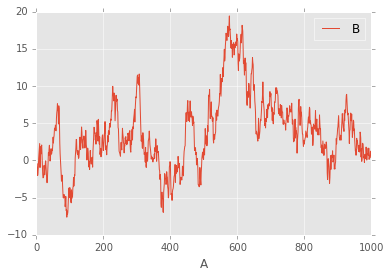

In [9]:
#也能够通过x，y关键字参数指定plot的x，y轴
df3 = pd.DataFrame(np.random.randn(1000,2),columns=["B","C"])
df3 = df3.cumsum()

df3["A"] = pd.Series(list(range(len(df))))
df3.plot(x="A",y="B")

### 其他绘图样式
plot方法可以使用其他样式，通过kind关键字参数指定，其中包括
  
  * "bar"或者"barh",柱状图
  * "hist",直方图
  * "area",区域图
  * "scatter",散点图
  * "hexbin",六角图
  * "pie",饼状图

#### 柱状图

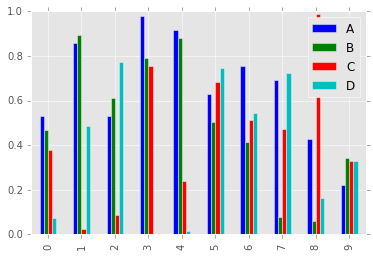

In [11]:
df2 = pd.DataFrame(np.random.rand(10,4),columns=list("ABCD"))

df2.plot.bar()
#df.plot(kind="bar")

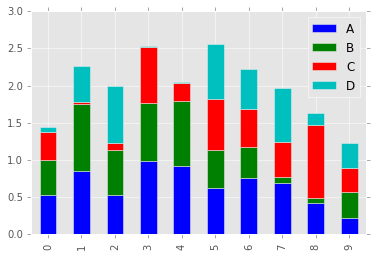

In [13]:
#可以将数据堆积起来
df2.plot.bar(stacked=True)

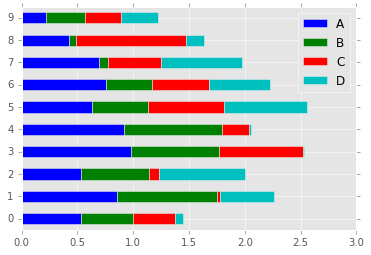

In [14]:
#也可以通过barh将数据横向展示
df2.plot.barh(stacked=True)

#### 直方图

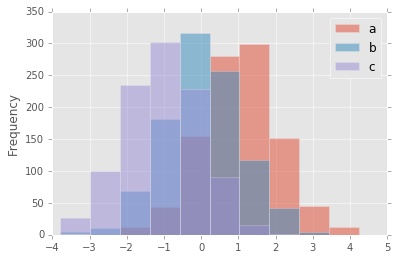

In [16]:
df3 = pd.DataFrame({"a":np.random.randn(1000) + 1,
                    "b":np.random.randn(1000),
                    "c":np.random.randn(1000) - 1},
                    columns=["a","b","c"])
df3.plot.hist(alpha=0.5)
#alpha 指定透明度

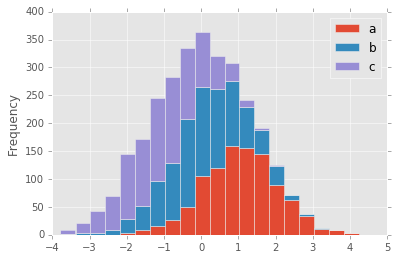

In [17]:
#使用stacked=True表示堆积，bins指定格子(bin)数量
df3.plot.hist(stacked=True,bins=20)

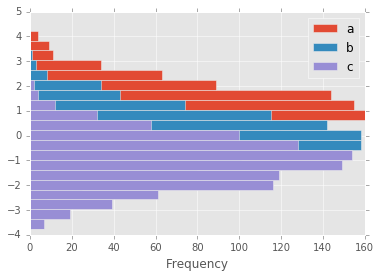

In [20]:
#通过orientation="horizontal"将显示方式改为水平
df3.plot.hist(orientation="horizontal",bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001154F9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011EEA940>]], dtype=object)

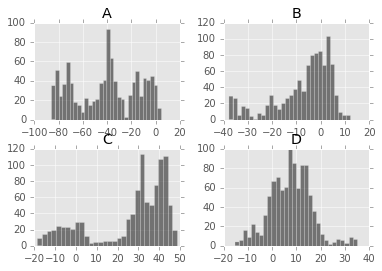

In [22]:
#将结果通过多个子图展示
#plt.figure()

df.hist(color="k",alpha=0.5,bins=30)

#### 面积图
通过Series.plot.area()或者DataFrame.plot.area()创建,默认stacked，如果要生成stacked面积图，每个字段必须都为正数或者所有非负数。

当输入的数据包括NaN时，会自动用0填充，如果需要删除或者填充这些值，可以在绘图前调用DataFrame.dropna()或者DataFrame.fillna。

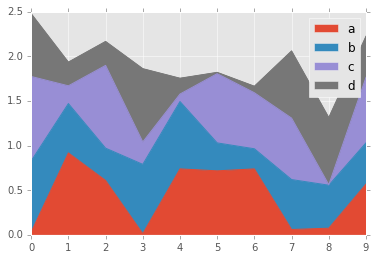

In [29]:
#注意: random.randn 与rand的区别是取的随机数样本不一样~
df = pd.DataFrame(np.random.rand(10,4),columns=list("abcd"))
df.plot.area()

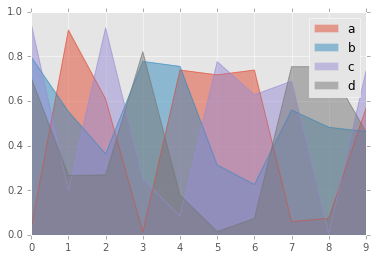

In [30]:
#指定stacked=False,使其不堆积
df.plot.area(stacked=False)

#### 散点图
散点图的x，y轴需要数值字段，可以通过x，y关键字参数指定x，y轴

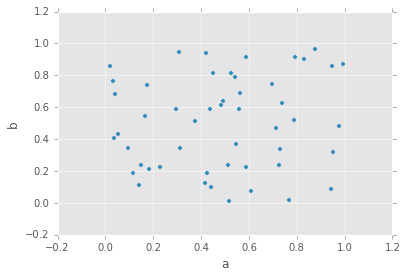

In [31]:
df = pd.DataFrame(np.random.rand(50,4),columns=list("abcd"))
df.plot.scatter(x="a",y="b")

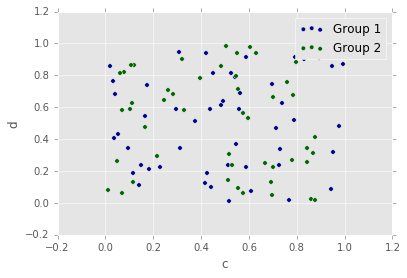

In [32]:
#指定多个字段组在单个轴绘图，可以指定ax重复plot方法，
#推荐指定颜色以及标签用以区别不同的组

ax = df.plot.scatter(x="a",y="b",color="DarkBlue",label="Group 1")
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

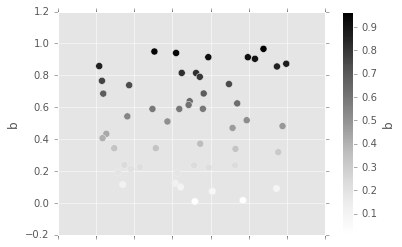

In [39]:
#通过c关键词参数指定色度条，s关键字参数指定点的大小
#注：传入的c,s对象都可以是等长的序列
df.plot.scatter(x="a",y="b",c="c",s=50)

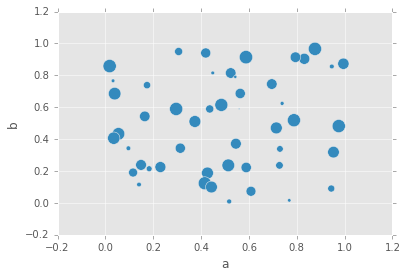

In [40]:
df.plot.scatter(x='a', y='b', s=df['c']*200);

#### 六边形图(Hexbin)

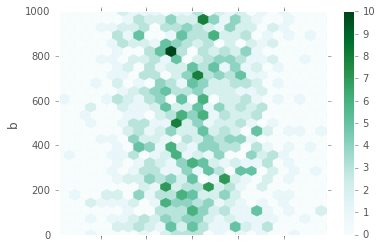

In [3]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)
df.plot.hexbin(x="a",y="b",gridsize=25)

#### 饼状图
如果数据包含NaN，它会自动用0填充，负值则会报ValueError

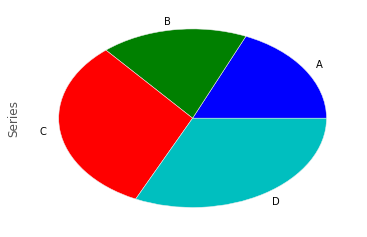

In [11]:
series = pd.Series( 3 * np.random.rand(4),index=list("ABCD"),name="Series")

series.plot.pie()

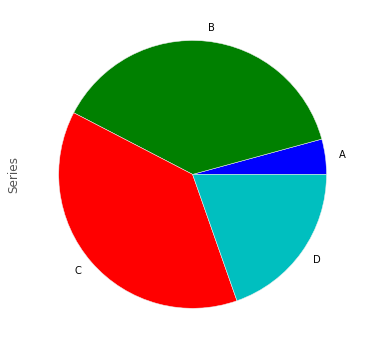

In [10]:
#如上所示，默认是有所收缩的，需要通过指定一样的长宽或者强制调用ax.set_aspect('equal') 
series.plot.pie(figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0CE438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE03EF0>], dtype=object)

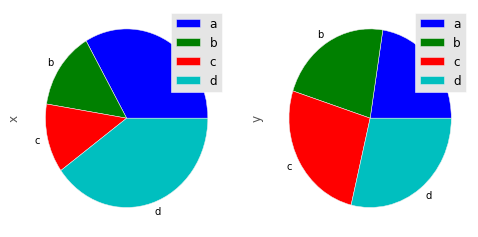

In [12]:
#注意DataFrame需要指定关键字参数y=，或者subplot=True
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df.plot.pie(subplots=True, figsize=(8, 4))

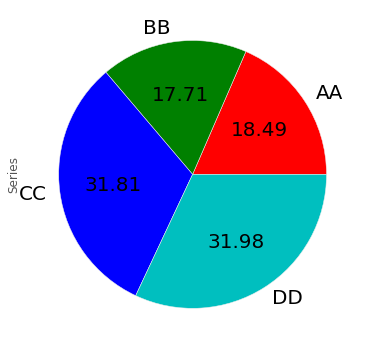

In [14]:
#还可以指定标签，字体大小等
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', fontsize=20, figsize=(6, 6))

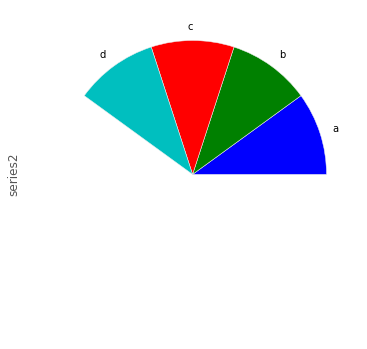

In [16]:
#如果传入的值总和小于1，会绘制一个扇形
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series.plot.pie(figsize=(6, 6))
plt.savefig("text.png")